<a href="https://colab.research.google.com/github/msan222/MyResponseBot/blob/main/Assignment2CovidPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pdb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import os
import gdown
import operator
import datetime
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('seaborn')
%matplotlib inline

In [ ]:
#downloading datasets
gdown.download("https://drive.google.com/uc?id=1JX-obX5QFN9uDTNCXIPMVCFDK0zFHw6b",'confirmed.csv',quiet=False)
#assigning datasets
confirmed_cases = pd.read_csv('/content/confirmed.csv')

Downloading...
From: https://drive.google.com/uc?id=1JX-obX5QFN9uDTNCXIPMVCFDK0zFHw6b
To: /content/confirmed.csv
100%|██████████| 68.9k/68.9k [00:00<00:00, 30.8MB/s]


In [ ]:
#getting columns from the datasets (each category)
columns = confirmed_cases.keys()
#getting only the dates of the datasets (where all the numbers are)
confirmed = confirmed_cases.loc[:, columns[4]:columns[-1]]

In [ ]:
#finding total confirmed cases and adding to a list
world_cases = []
dates = confirmed.keys()
for i in dates:
  confirmed_sum = confirmed[i].sum()
  world_cases.append(confirmed_sum)

In [ ]:
#turn dates list and all case data into numpy array to work with 
days_since0122 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)

In [ ]:
#predict next 10 days
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [ ]:
#converting format to datetime
start = '1/22/2000'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
#data for latest date used (03/15/2020)
latest_confirmed = confirmed_cases[dates[-1]]
#finding induvidual countries
unique_countries = list(confirmed_cases['Country/Region'].unique())

In [ ]:
#calculating the cases per country 
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
  cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
  if cases > 0:
    country_confirmed_cases.append(cases)
  else:
    no_cases.append(i)

for i in no_cases:
  unique_countries.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
  country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [ ]:
#showing the numbers per country
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
  print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
China: 81003 cases
Italy: 24747 cases
Iran: 13938 cases
Korea, South: 8162 cases
Spain: 7798 cases
Germany: 5795 cases
France: 4513 cases
US: 3499 cases
Switzerland: 2200 cases
Norway: 1221 cases
United Kingdom: 1144 cases
Netherlands: 1135 cases
Sweden: 1022 cases
Belgium: 886 cases
Denmark: 875 cases
Austria: 860 cases
Japan: 839 cases
Cruise Ship: 696 cases
Malaysia: 428 cases
Qatar: 401 cases
Greece: 331 cases
Australia: 297 cases
Czechia: 253 cases
Canada: 252 cases
Israel: 251 cases
Portugal: 245 cases
Finland: 244 cases
Singapore: 226 cases
Slovenia: 219 cases
Bahrain: 214 cases
Estonia: 171 cases
Iceland: 171 cases
Brazil: 162 cases
Philippines: 140 cases
Romania: 131 cases
Ireland: 129 cases
Poland: 119 cases
Indonesia: 117 cases
Iraq: 116 cases
Thailand: 114 cases
India: 113 cases
Kuwait: 112 cases
Egypt: 110 cases
Lebanon: 110 cases
Saudi Arabia: 103 cases
San Marino: 101 cases
United Arab Emirates: 98 cases
Chile: 74 cases
Russia: 63 ca

In [ ]:
#finding state/provinces
unique_provinces = list(confirmed_cases['Province/State'].unique())
outliers = ['United Kingdom','Denmark','France']
for i in outliers:
  unique_provinces.remove(i)

In [ ]:
#finding cases per state/province
province_confirmed_cases = [] 
no_cases = []
for i in unique_provinces:
  cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
  if cases>0:
    province_confirmed_cases.append(cases)
  else:
    no_cases.append(i)
  
for i in no_cases:
  unique_provinces.remove(i)

In [ ]:
#showing cases per state/province/city
for i in range(len(unique_provinces)):
  print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

British Columbia: 73 cases
New South Wales: 134 cases
Victoria: 57 cases
Queensland: 61 cases
South Australia: 20 cases
Western Australia: 17 cases
Tasmania: 6 cases
Northern Territory: 1 cases
Ontario: 104 cases
Alberta: 39 cases
Quebec: 24 cases
Washington: 643 cases
New York: 732 cases
California: 426 cases
Massachusetts: 164 cases
Diamond Princess: 742 cases
Grand Princess: 23 cases
Georgia: 99 cases
Colorado: 131 cases
Florida: 115 cases
New Jersey: 98 cases
Oregon: 36 cases
Texas: 72 cases
Illinois: 93 cases
Pennsylvania: 66 cases
Iowa: 18 cases
Maryland: 32 cases
North Carolina: 33 cases
South Carolina: 28 cases
Tennessee: 39 cases
Virginia: 45 cases
Arizona: 13 cases
Indiana: 20 cases
Kentucky: 20 cases
District of Columbia: 16 cases
Nevada: 24 cases
New Hampshire: 13 cases
Minnesota: 35 cases
Nebraska: 17 cases
Ohio: 37 cases
Rhode Island: 20 cases
Wisconsin: 32 cases
Connecticut: 24 cases
Hawaii: 6 cases
Oklahoma: 7 cases
Utah: 28 cases
Kansas: 8 cases
Louisiana: 91 cases
Mis

In [ ]:
#handling nan numbers if present
nan_indices = []

for i in range(len(unique_provinces)):
  if type(unique_provinces[i]) == float:
    nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
  unique_provinces.pop(i)
  province_confirmed_cases.pop(i)

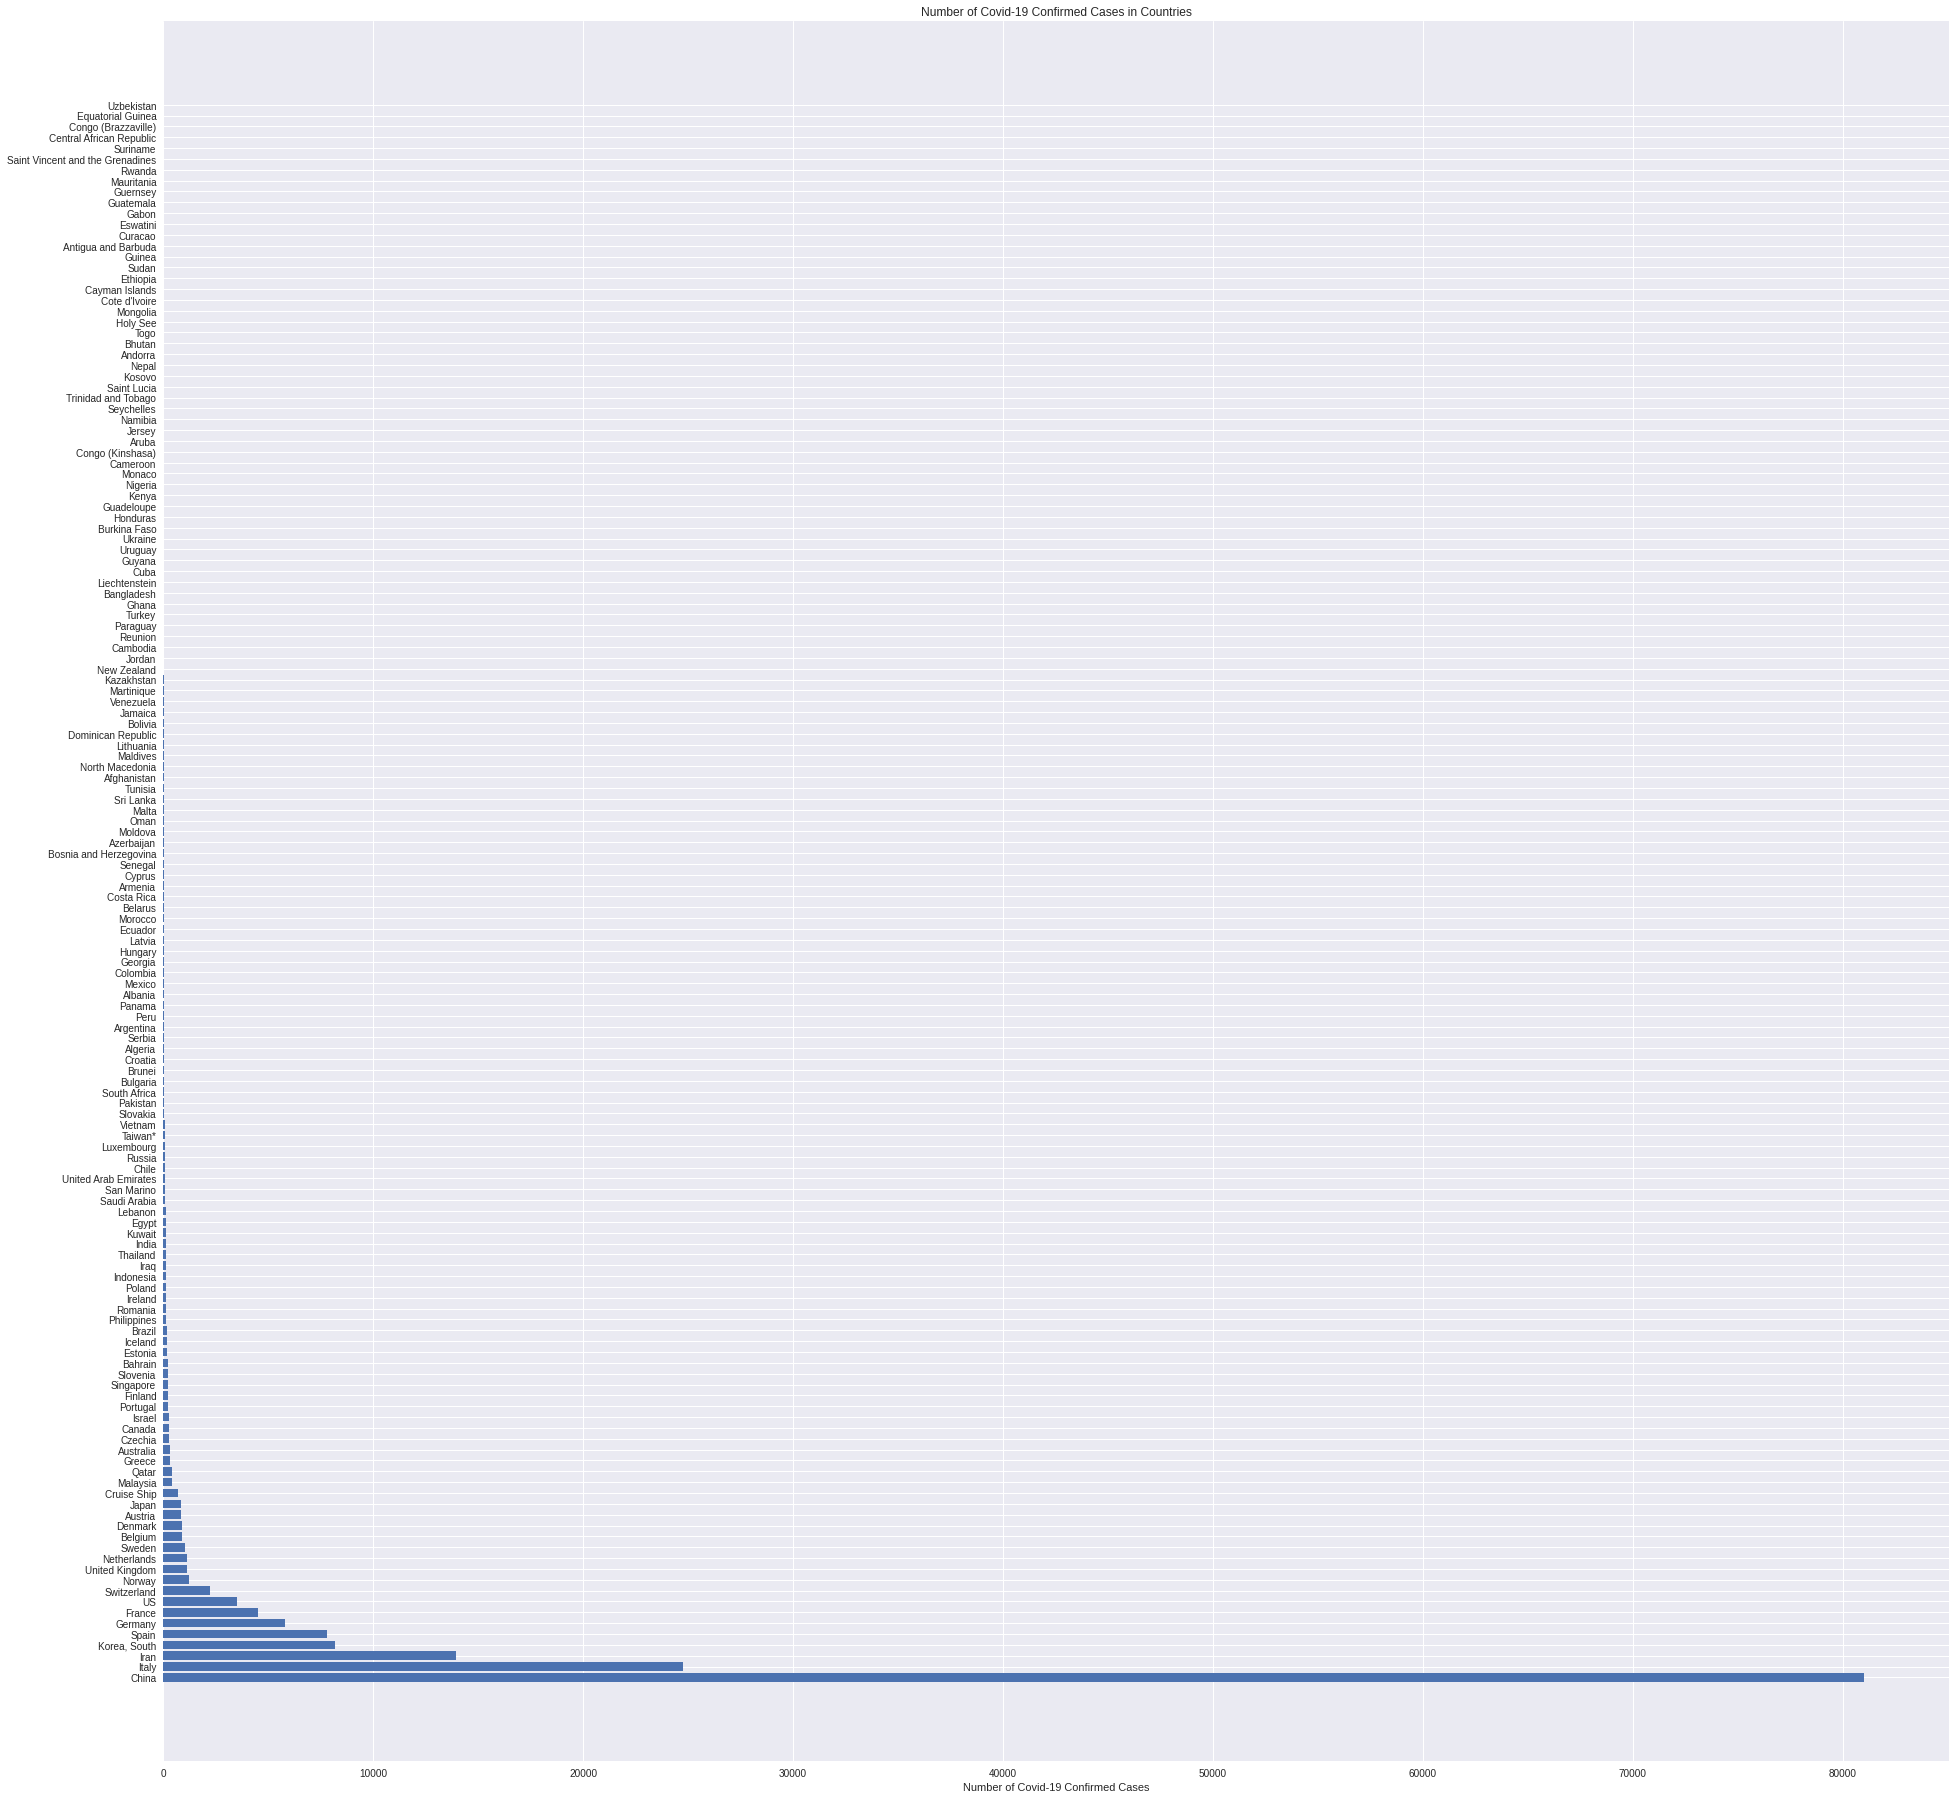

In [ ]:
#bar graph for confirmed cases in each country
plt.figure(figsize=(32,32))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid-19 Confirmed Cases')
plt.show()

In [ ]:
 #create SVM model
 kernel = ['poly','sigmoid', 'rbf']
 c = [0.01, 0.1, 1, 10]
 
 epsilon = [0.01, 0.1, 1]
 gamma = [0.01, 0.1, 1]
 shrinking = [True, False]

 svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

 svm = SVR()
 svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
 X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since0122, world_cases, test_size=0.15, shuffle=False)
 svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

MAE: 16262.408868487113
MAE: 284689228.296391


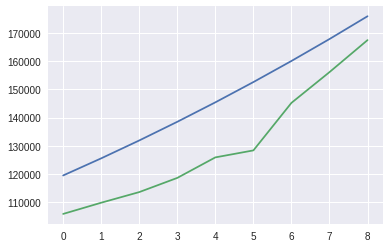

In [ ]:
#check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MAE:', mean_squared_error(svm_test_pred, y_test_confirmed))

<function matplotlib.pyplot.show>

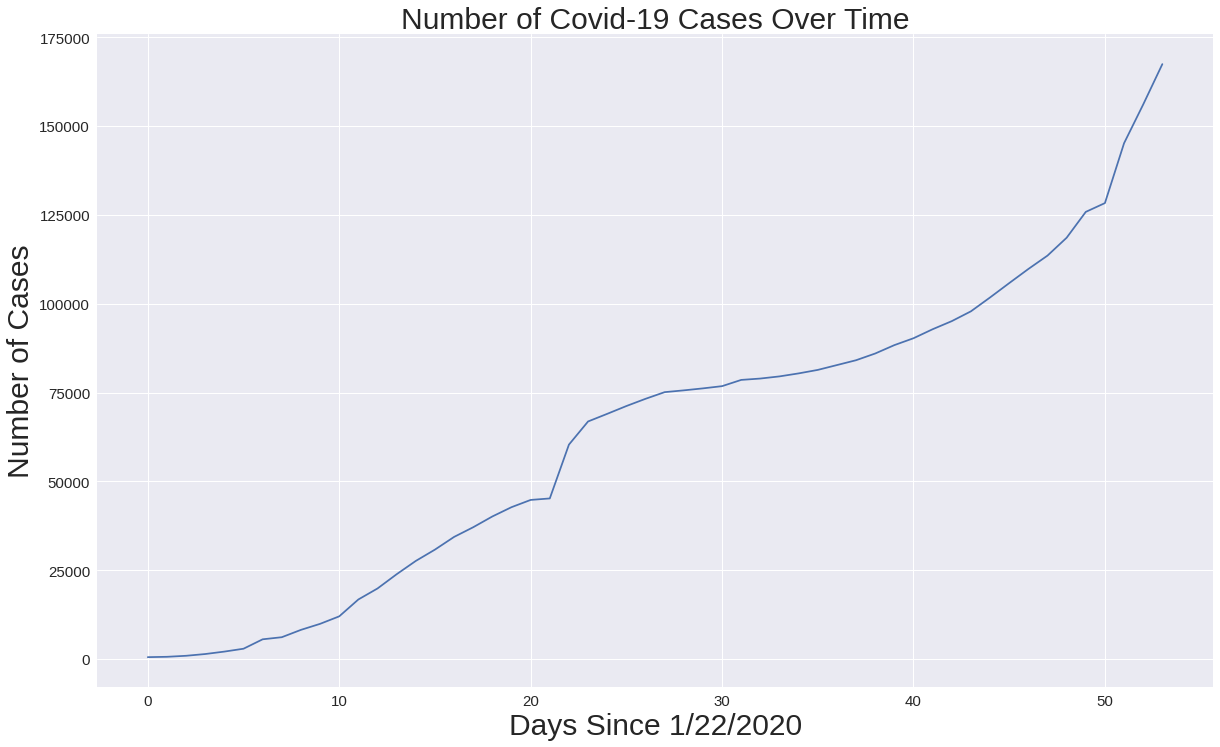

In [ ]:
#Total number of covid-19 cases over time
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Covid-19 Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show

In [ ]:
days_since0122 = list(days_since0122)
world_cases = list(world_cases)

print('Total Covid Cases Over Time Per Day:')
for i in range(len(days_since0122)):
  print(f'{dates[i]}: {world_cases[i]} cases')

Total Covid Cases Over Time Per Day:
1/22/20: [555] cases
1/23/20: [653] cases
1/24/20: [941] cases
1/25/20: [1434] cases
1/26/20: [2118] cases
1/27/20: [2927] cases
1/28/20: [5578] cases
1/29/20: [6166] cases
1/30/20: [8234] cases
1/31/20: [9927] cases
2/1/20: [12038] cases
2/2/20: [16787] cases
2/3/20: [19881] cases
2/4/20: [23892] cases
2/5/20: [27635] cases
2/6/20: [30817] cases
2/7/20: [34391] cases
2/8/20: [37120] cases
2/9/20: [40150] cases
2/10/20: [42762] cases
2/11/20: [44802] cases
2/12/20: [45221] cases
2/13/20: [60368] cases
2/14/20: [66885] cases
2/15/20: [69030] cases
2/16/20: [71224] cases
2/17/20: [73258] cases
2/18/20: [75136] cases
2/19/20: [75639] cases
2/20/20: [76197] cases
2/21/20: [76823] cases
2/22/20: [78579] cases
2/23/20: [78965] cases
2/24/20: [79568] cases
2/25/20: [80413] cases
2/26/20: [81395] cases
2/27/20: [82754] cases
2/28/20: [84120] cases
2/29/20: [86011] cases
3/1/20: [88369] cases
3/2/20: [90306] cases
3/3/20: [92840] cases
3/4/20: [95120] cases


In [ ]:
predictions_list = list(svm_pred)

print('SVM Predicted Total Covid Cases Over Time Per Day:')
for i in range(len(future_forecast_dates)):
  print(f'{future_forecast_dates[i]}: {predictions_list[i]} cases')

SVM Predicted Total Covid Cases Over Time Per Day:
01/22/2000: 30387.444308980794 cases
01/23/2000: 30388.421764072846 cases
01/24/2000: 30395.263949717213 cases
01/25/2000: 30413.835596466204 cases
01/26/2000: 30450.001434872134 cases
01/27/2000: 30509.62619548732 cases
01/28/2000: 30598.57460886407 cases
01/29/2000: 30722.711405554703 cases
01/30/2000: 30887.901316111525 cases
01/31/2000: 31100.009071086857 cases
02/01/2000: 31364.899401033006 cases
02/02/2000: 31688.437036502288 cases
02/03/2000: 32076.486708047018 cases
02/04/2000: 32534.913146219504 cases
02/05/2000: 33069.58108157206 cases
02/06/2000: 33686.35524465701 cases
02/07/2000: 34391.10036602666 cases
02/08/2000: 35189.68117623332 cases
02/09/2000: 36087.9624058293 cases
02/10/2000: 37091.80878536692 cases
02/11/2000: 38207.08504539849 cases
02/12/2000: 39439.65591647632 cases
02/13/2000: 40795.38612915276 cases
02/14/2000: 42280.14041398006 cases
02/15/2000: 43899.783501510574 cases
02/16/2000: 45660.1801222966 cases
02

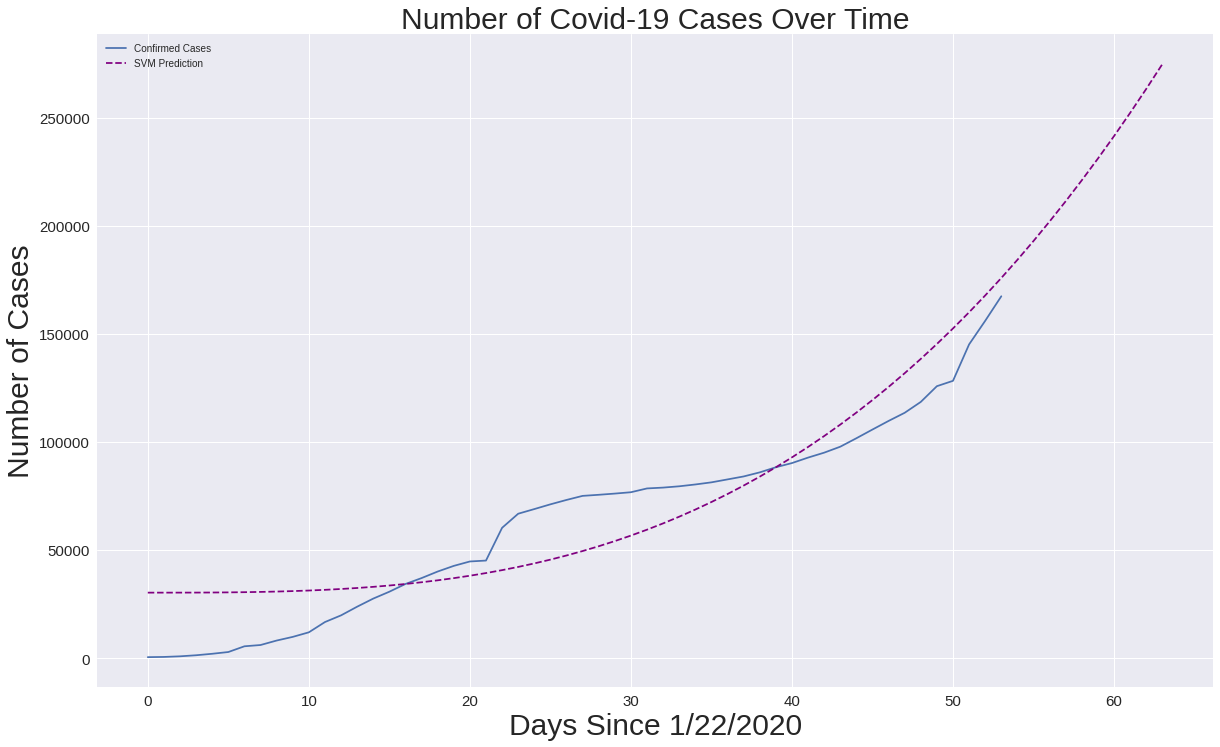

In [ ]:
#confirmed vs SVM predicted cases
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Covid-19 Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM Prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
#SVM predicts next 10 days
print('SVM future predictions')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions


{('03/16/2000', 184301.4329238902),
 ('03/17/2000', 193011.53524916767),
 ('03/18/2000', 202044.19775482191),
 ('03/19/2000', 211405.28517140614),
 ('03/20/2000', 221100.66222947178),
 ('03/21/2000', 231136.19365957196),
 ('03/22/2000', 241517.74419225854),
 ('03/23/2000', 252251.1785580839),
 ('03/24/2000', 263342.36148760037),
 ('03/25/2000', 274797.15771136014)}

In [ ]:
#predict with linear regression model

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 11965.537037037033
MSE: 307996364.0108404


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


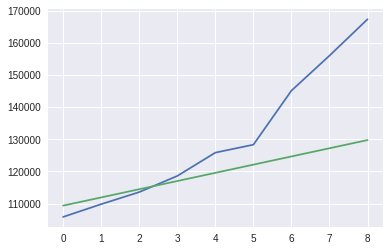

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

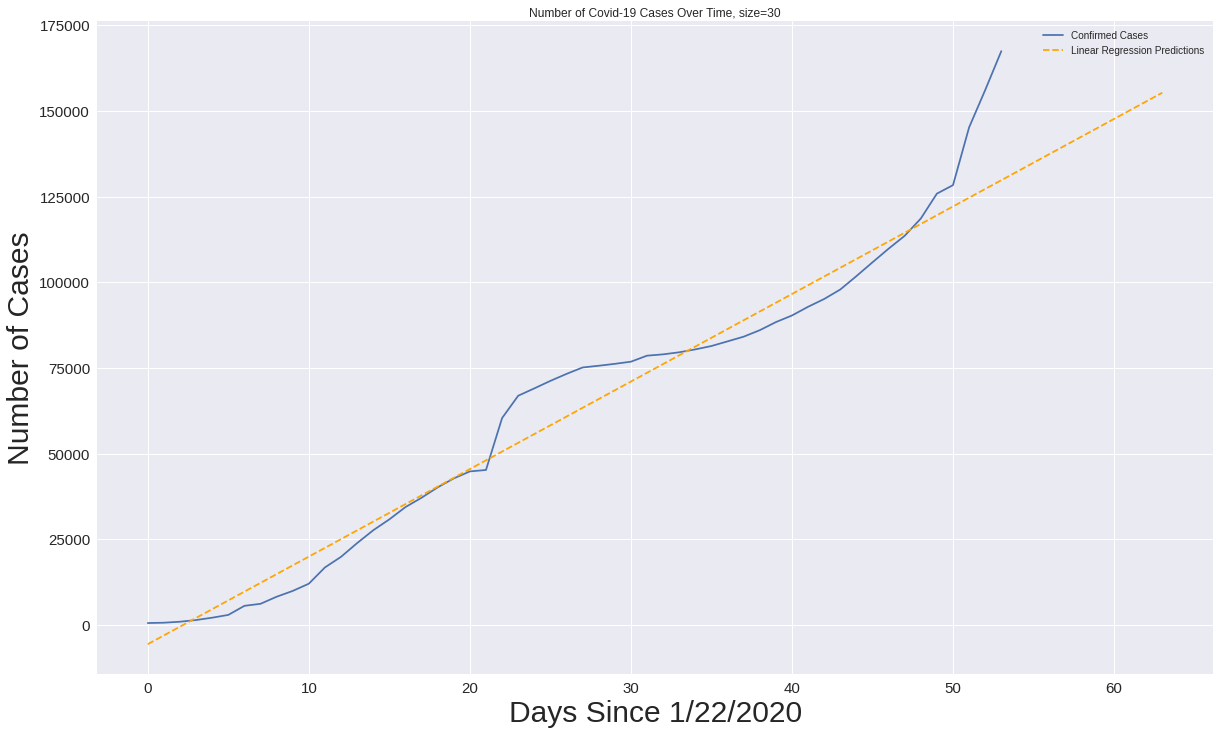

In [ ]:
#Confirmed vs Predicted Cases
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast,linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Covid-19 Cases Over Time, size=30')
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
print('Linear regression future predictions: ')
print(linear_pred[-10:])

Linear regression future predictions: 
[[132336.25252525]
 [134890.72222222]
 [137445.19191919]
 [139999.66161616]
 [142554.13131313]
 [145108.6010101 ]
 [147663.07070707]
 [150217.54040404]
 [152772.01010101]
 [155326.47979798]]
